In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos
Leemos los dataframes con los resultados.

In [10]:

df_resultados_maximo_secuencial = pd.read_csv("../resultados/resultado_maximo_secuencial.csv");
df_resultados_maximo_concurrente = pd.read_csv("../resultados/resultado_maximo_concurrente.csv");
df_resultados_maximo = df_resultados_maximo_secuencial.append(df_resultados_maximo_concurrente, ignore_index = True);
df_resultados_maximo["n"] = df_resultados_maximo.apply(lambda column: 200*column)

df_resultados_cargarArchivo_secuencial = pd.read_csv("../resultados/resultado_cargarArchivo_secuencial.csv");
df_resultados_cargarArchivo_concurrente = pd.read_csv("../resultados/resultado_cargarArchivo_concurrente.csv");
df_resultados_cargarArchivo = df_resultados_cargarArchivo_secuencial.append(df_resultados_cargarArchivo_concurrente, ignore_index = True);

df_resultados_cargarArchivo_secuencial_150 = pd.read_csv("../resultados/resultado_cargarArchivo_secuencial_150.csv");
df_resultados_cargarArchivo_concurrente_150 = pd.read_csv("../resultados/resultado_cargarArchivo_concurrente_150.csv");
df_resultados_cargarArchivo_150 = df_resultados_cargarArchivo_secuencial_150.append(df_resultados_cargarArchivo_concurrente_150, ignore_index = True);




<ipython-input-11-ecf578601821>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximo_secuencial['es_secuencial'] = 'secuencial'


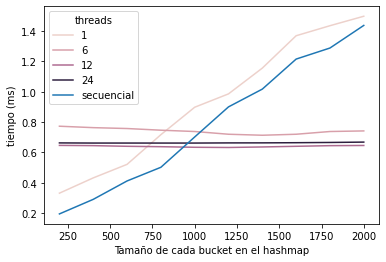

In [11]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_maximo_concurrente = df_resultados_maximo[((df_resultados_maximo['cantThreadsMaximo'] == 1) | (df_resultados_maximo['cantThreadsMaximo'] == 6) | (df_resultados_maximo['cantThreadsMaximo'] == 12) | (df_resultados_maximo['cantThreadsMaximo'] == 24)) & (df_resultados_maximo['es_secuencial'] == 'No')]
df_maximo_secuencial = df_resultados_maximo[(df_resultados_maximo['es_secuencial'] == 'Si')]
df_maximo_secuencial['es_secuencial'] = 'secuencial'
fig = sns.lineplot(data=df_maximo_concurrente, x='n', y='tiempo', hue='cantThreadsMaximo');
fig = sns.lineplot(data=df_maximo_secuencial, x='n', y='tiempo', hue='es_secuencial');
fig.set(xlabel='Tamaño de cada bucket en el hashmap', ylabel='tiempo (ms)');
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[0:], labels=labels[0:], title= "threads")

plt.savefig("../graficos/maximo-threadsYsecuencial.svg");

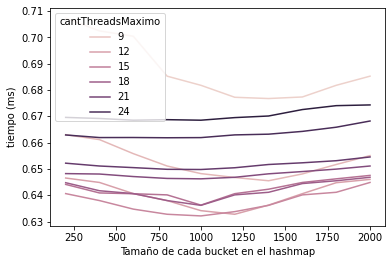

In [12]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_maximo_2 = df_resultados_maximo[((df_resultados_maximo['cantThreadsMaximo'] %2 == 0) & (df_resultados_maximo['es_secuencial'] == 'No') & (df_resultados_maximo['cantThreadsMaximo'] > 6))]
fig = sns.lineplot(data=df_maximo_2, x='n', y='tiempo', hue='cantThreadsMaximo');
fig.set(xlabel='Tamaño de cada bucket en el hashmap', ylabel='tiempo (ms)');
plt.savefig("../graficos/maximo-threads.svg");

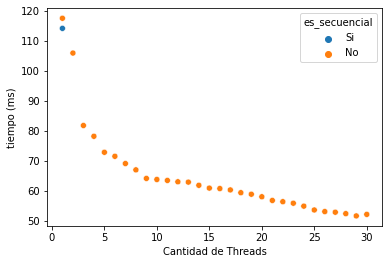

In [13]:
# Graficamos los gaps de ejecución de cada dataset en función de n.
fig = sns.scatterplot(data=df_resultados_cargarArchivo, x='cantThreadsLectura', y='tiempo', hue = 'es_secuencial');
fig.set(xlabel='Cantidad de Threads', ylabel='tiempo (ms)');
plt.savefig("../graficos/cargarArchivos.svg");

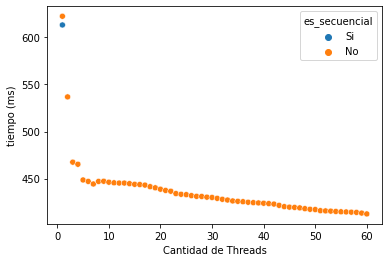

In [14]:
# Graficamos los gaps de ejecución de cada dataset en función de n.
fig = sns.scatterplot(data=df_resultados_cargarArchivo_150, x='cantThreadsLectura', y='tiempo', hue = 'es_secuencial');
fig.set(xlabel='Cantidad de Threads', ylabel='tiempo (ms)');
plt.savefig("../graficos/cargarArchivos_150.svg");